In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Data

In [85]:
crop = pd.read_csv("Crop_recommendation (2).csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Asq Six Question to yourself

In [86]:
crop.shape

(8800, 8)

In [87]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            8800 non-null   int64  
 1   P            8800 non-null   int64  
 2   K            8800 non-null   int64  
 3   temperature  8800 non-null   float64
 4   humidity     8800 non-null   float64
 5   ph           8800 non-null   float64
 6   rainfall     8800 non-null   float64
 7   label        8800 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 550.1+ KB


In [88]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [89]:
crop.duplicated().sum()

0

In [90]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000
mean,55.080909,51.444091,40.482727,26.774572,71.443720,6.609499,100.669506
std,37.059675,27.973451,38.555468,5.322922,22.761454,0.877838,56.017885
min,0.000000,4.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,25.000000,30.000000,20.000000,23.826868,58.192235,6.081469,60.745835
50%,42.000000,51.000000,29.000000,26.924435,79.960550,6.566980,90.402966
75%,89.000000,66.000000,46.000000,29.774256,89.417267,7.086870,122.704272
max,149.000000,150.000000,206.000000,46.732778,104.980970,10.233143,298.560117


# Exploring Data

In [91]:
corr = crop.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.151694,-0.013823,-0.008321,0.256242,0.052610,0.096882
P,-0.151694,1.000000,0.599535,-0.071754,-0.269703,-0.065218,-0.094005
K,-0.013823,0.599535,1.000000,-0.107355,0.094312,-0.090915,-0.078071
temperature,-0.008321,-0.071754,-0.107355,1.000000,0.225111,-0.004882,-0.042752
humidity,0.256242,-0.269703,0.094312,0.225111,1.000000,0.018312,0.116706
ph,0.052610,-0.065218,-0.090915,-0.004882,0.018312,1.000000,-0.103675
rainfall,0.096882,-0.094005,-0.078071,-0.042752,0.116706,-0.103675,1.000000


In [92]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

<AxesSubplot:>

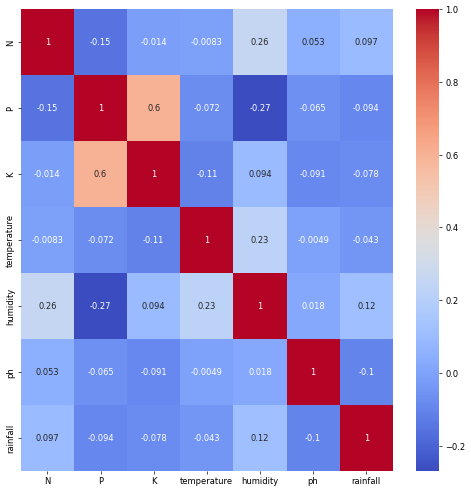

In [93]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

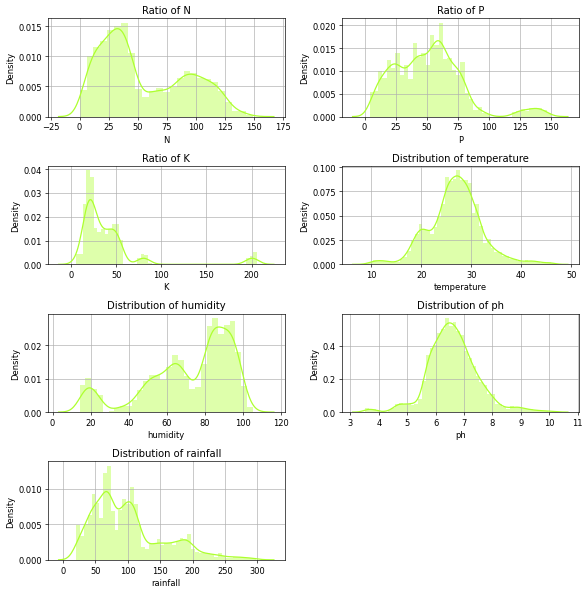

In [94]:
# over all distribution

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 60

features = ['N', 'P', 'K', 'temperature',
			'humidity', 'ph', 'rainfall']

for i, feat in enumerate(features):
	plt.subplot(4, 2, i + 1)
	sns.distplot(crop[feat], color='greenyellow')
	if i < 3:
		plt.title(f'Ratio of {feat}', fontsize=12)
	else:
		plt.title(f'Distribution of {feat}', fontsize=12)
	plt.tight_layout()
	plt.grid()


In [95]:
# sns.pairplot(crop, hue='label')


In [96]:
crop['label'].value_counts()

rice           400
maize          400
coffee         400
jute           400
cotton         400
coconut        400
papaya         400
orange         400
muskmelon      400
watermelon     400
grapes         400
mango          400
banana         400
pomegranate    400
lentil         400
blackgram      400
mungbean       400
mothbeans      400
pigeonpeas     400
kidneybeans    400
chickpea       400
groundnuts     400
Name: label, dtype: int64

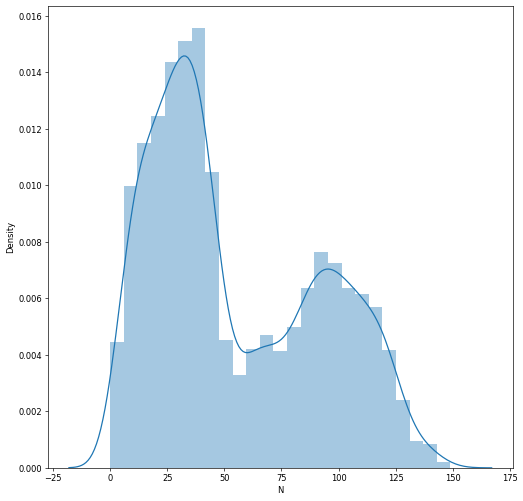

In [97]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

# Encoding

In [98]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'groundnuts': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [99]:
crop['crop_num'].value_counts()

1     400
2     400
22    400
3     400
4     400
5     400
6     400
7     400
9     400
10    400
11    400
12    400
13    400
14    400
15    400
16    400
17    400
18    400
19    400
20    400
21    400
8     400
Name: crop_num, dtype: int64

In [100]:

crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


# Train Test Split

In [101]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [102]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
8795,13,63,23,31.391055,51.453392,9.181497,42.440543
8796,31,55,17,29.923445,64.416451,8.898774,70.104721
8797,42,51,18,26.608803,50.689086,8.880159,63.918765
8798,11,55,18,27.688200,48.261590,6.013664,38.532547


In [103]:
y.shape

(8800,)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
X_train.shape

(7040, 7)

In [107]:
X_test.shape

(1760, 7)

In [108]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
2067,89,28,33,26.444141,53.838762,6.993236,175.372331
4982,26,56,25,26.804744,48.239914,3.525366,43.878020
8648,94,39,33,28.086732,57.000487,7.059632,133.112023
1643,59,62,52,43.675493,93.108872,6.608668,103.823566
106,93,41,17,25.621717,66.504155,6.047907,105.465470
...,...,...,...,...,...,...,...
5734,105,13,51,26.179346,86.522581,6.259336,49.430510
5191,66,63,17,28.546224,66.313941,7.368319,62.834699
5390,16,21,36,23.779890,92.933869,5.893332,106.977723
860,32,78,22,23.970814,62.355576,7.007038,53.409060



# Scale the features using MinMaxScaler

In [109]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [110]:
X_train

array([[0.59731544, 0.16438356, 0.13930348, ..., 0.43628135, 0.51847219,
        0.55743382],
       [0.17449664, 0.35616438, 0.09950249, ..., 0.37456765, 0.0030637 ,
        0.08502551],
       [0.63087248, 0.23972603, 0.13930348, ..., 0.47113169, 0.52834017,
        0.40560885],
       ...,
       [0.10738255, 0.11643836, 0.15422886, ..., 0.86720997, 0.35500018,
        0.31171839],
       [0.2147651 , 0.50684932, 0.08457711, ..., 0.53015854, 0.52052343,
        0.11926686],
       [0.19463087, 0.28082192, 0.07960199, ..., 0.87854126, 0.56187093,
        0.11034135]])

# Standarization

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [112]:
X_train

array([[ 0.90830819, -0.83551216, -0.19737943, ..., -0.77938952,
         0.44305916,  1.33265157],
       [-0.78932247,  0.16187264, -0.40323123, ..., -1.02501134,
        -3.52765368, -1.01071826],
       [ 1.04304078, -0.44368242, -0.19737943, ..., -0.64068443,
         0.51908215,  0.5795275 ],
       ...,
       [-1.05878765, -1.08485835, -0.120185  , ...,  0.93571544,
        -0.81633106,  0.11378621],
       [-0.62764336,  0.94553212, -0.48042566, ..., -0.40575634,
         0.4588619 , -0.84086488],
       [-0.70848291, -0.2299571 , -0.50615714, ...,  0.98081423,
         0.77740356, -0.88513965]])

# Training Models

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs',max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9193181818181818
Naive Bayes  with accuracy : 0.9329545454545455
Support Vector Machine  with accuracy : 0.9323863636363636
K-Nearest Neighbors  with accuracy : 0.9164772727272728
Decision Tree  with accuracy : 0.90625
Random Forest  with accuracy : 0.9102272727272728
Bagging  with accuracy : 0.9096590909090909
AdaBoost  with accuracy : 0.16193181818181818
Gradient Boosting  with accuracy : 0.9142045454545454
Extra Trees  with accuracy : 0.8710227272727272


In [118]:
rfc = GradientBoostingClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9142045454545454

# Predictive System

In [120]:
def recommendation(N,P,k,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfall]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)
    return prediction[0] 
N = 120
P = 50
k = 10
temperature = 25.0
humidity = 76
ph = 5.78
rainfall = 200
predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange", 8: "groundnuts", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpeas", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Mothbeans is a best crop to be cultivated 


In [117]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))